In [1]:
import pandas as pd

train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
sample = pd.read_csv('dataset/sample_submission.csv')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   instock_date      3430 non-null   object 
 3   Market_Category   3430 non-null   int64  
 4   Customer_name     3377 non-null   object 
 5   Loyalty_customer  3430 non-null   object 
 6   Product_Category  3430 non-null   object 
 7   Grade             3430 non-null   int64  
 8   Demand            3430 non-null   int64  
 9   Discount_avail    3430 non-null   int64  
 10  charges_1         3394 non-null   float64
 11  charges_2 (%)     3425 non-null   float64
 12  Minimum_price     3416 non-null   float64
 13  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 375.3+ KB


In [4]:
toremove = ['Product_id', 'Customer_name', 'Loyalty_customer', 'instock_date']
train.drop(columns = toremove, inplace = True)
train

,Stall_no,Market_Category,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,24,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,447,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,23,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,63,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...
6363,17.0,24,Technology,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
6364,21.0,55,Child_care,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
6365,36.0,358,Repair,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
6366,27.0,452,Repair,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


In [5]:
categories = train['Product_Category'].unique().astype(list)
train['Product_Category'] = pd.factorize(train['Product_Category'])[0]
train['Product_Category']

0       0
1       0
2       1
3       2
4       3
       ..
6363    4
6364    1
6365    3
6366    3
6367    4
Name: Product_Category, Length: 6368, dtype: int64

In [6]:
corr = train.corr()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

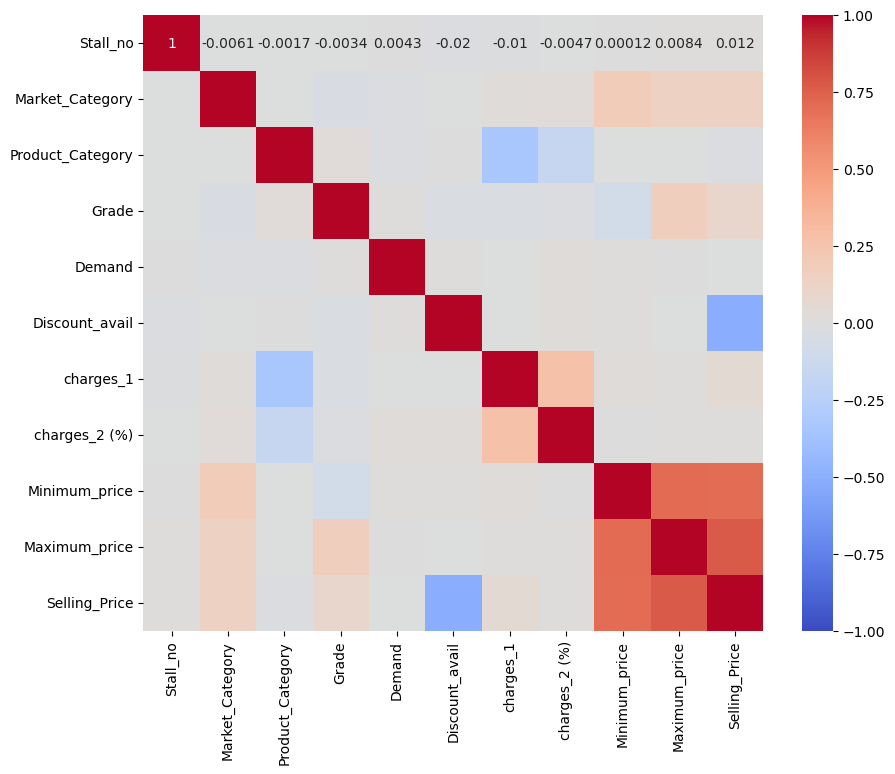

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [9]:
import numpy as np
train.replace("?", np.nan, inplace = True)


In [10]:
missing_data = train.isnull().sum()
missing_data

Stall_no              5
Market_Category       0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [11]:
train.dropna(subset=["Stall_no", "Discount_avail"], axis=0, inplace=True)
train.reset_index(drop=True, inplace=True)

In [12]:
train.describe()

,Stall_no,Market_Category,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6129.000000,6121.000000,6287.000000,5984.000000,6285.000000
mean,25.315099,199.164743,4.521739,0.643794,50.980395,0.140553,264.393702,10.140337,3534.903611,6441.410929,4568.454916
std,14.329010,170.277630,2.859405,1.025333,29.075584,0.347588,124.601362,4.320086,2196.817253,3722.794855,2983.256472
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,2.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.500000,3920.500000,2451.581440
50%,25.000000,131.000000,5.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3162.000000,5644.000000,4213.292160
75%,37.000000,403.000000,7.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4709.000000,8138.500000,6173.422596
max,50.000000,471.000000,9.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [13]:
avg_charge1 = train['charges_1'].astype('float').mean(axis=0)
train['charges_1'].replace(np.nan, avg_charge1, inplace = True)

C:\Users\Rosha\AppData\Local\Temp\ipykernel_4344\2209095564.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['charges_1'].replace(np.nan, avg_charge1, inplace = True)


In [14]:
avg_charge2 = train['charges_2 (%)'].astype('float').mean(axis =0)
train['charges_2 (%)'].replace(np.nan,  avg_charge2, inplace = True)

C:\Users\Rosha\AppData\Local\Temp\ipykernel_4344\1757409325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['charges_2 (%)'].replace(np.nan,  avg_charge2, inplace = True)


In [15]:
avg_maximumprice = train['Maximum_price'].astype('float').mean(axis = 0)
train['Maximum_price'].replace(np.nan, avg_maximumprice, inplace = True)

C:\Users\Rosha\AppData\Local\Temp\ipykernel_4344\981190333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Maximum_price'].replace(np.nan, avg_maximumprice, inplace = True)


In [16]:
avg_minprice = train['Minimum_price'].astype('float').mean(axis = 0)
train['Minimum_price'].replace(np.nan, avg_minprice, inplace = True)

C:\Users\Rosha\AppData\Local\Temp\ipykernel_4344\2915180175.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Minimum_price'].replace(np.nan, avg_minprice, inplace = True)


In [17]:
avg_y = train['Selling_Price'].astype(float).mean(axis = 0)
train['Selling_Price'].replace(np.nan, avg_y, inplace = True)

C:\Users\Rosha\AppData\Local\Temp\ipykernel_4344\1273958184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Selling_Price'].replace(np.nan, avg_y, inplace = True)


In [18]:
y = train['Selling_Price']
x = train.drop(columns = 'Selling_Price')
train

,Stall_no,Market_Category,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,0,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,24,0,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,447,1,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,23,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,63,3,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...
6320,17.0,24,4,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
6321,21.0,55,1,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
6322,36.0,358,3,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
6323,27.0,452,3,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


In [19]:
y = train['Selling_Price']
x = train.drop(columns = 'Selling_Price')
train

,Stall_no,Market_Category,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,0,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,24,0,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,447,1,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,23,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,63,3,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...
6320,17.0,24,4,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
6321,21.0,55,1,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
6322,36.0,358,3,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
6323,27.0,452,3,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42 )

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)

In [23]:
y_hat = lr.predict(x_test)

In [24]:
y_hat

array([6287.29065211, 4407.90848719, 5235.73292484, ..., 3743.39412446,
       1734.70379057, 3888.43103295])

In [25]:
lr.intercept_

661.0614159102597

In [26]:
lr.coef_

array([-1.04130276e+00,  4.73951321e-02, -5.63993965e+00,  5.99073277e+01,
        5.06771114e-02, -4.37156624e+03,  7.58786514e-01,  3.40384581e-01,
        4.90209327e-01,  3.99152577e-01])

In [27]:
lr.score(x_test, y_test)

0.9034986563163673

In [28]:
test = pd.read_csv('dataset/test.csv')
product_id = test.Product_id

In [29]:
test.drop(columns = toremove, inplace = True)

In [30]:
test.isnull().sum()

Stall_no             1
Market_Category      0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [31]:
avg_charge1 = test['charges_1'].astype(float).mean(axis = 0)
avg_charge2 = test['charges_2 (%)'].astype(float).mean(axis = 0)

test['charges_1'].replace(np.nan, avg_charge1, inplace = True)
test['charges_2 (%)'].replace(np.nan, avg_charge2, inplace = True)

C:\Users\Rosha\AppData\Local\Temp\ipykernel_4344\2457097426.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['charges_1'].replace(np.nan, avg_charge1, inplace = True)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_4344\2457097426.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [32]:
t = test['Stall_no'].isnull()
t

0       False
1       False
2       False
3       False
4       False
        ...  
3425    False
3426    False
3427    False
3428    False
3429    False
Name: Stall_no, Length: 3430, dtype: bool

In [33]:
for i in range(len(test['Stall_no'])):
    if t[i] == True:
       test.Stall_no[i] = test.Stall_no[i-1]+1
test.isnull().sum()

C:\Users\Rosha\AppData\Local\Temp\ipykernel_4344\3334182770.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test.Stall_no[i] = test.Stall_no[i-1]+1
C:\Users\Rosha\AppData\Local\Temp\ipykernel_4344\3334182770.py:3: SettingWithCopyWarning:

Stall_no             0
Market_Category      0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1            0
charges_2 (%)        0
Minimum_price       14
Maximum_price        0
dtype: int64

In [34]:
avg_minimum_price = test['Minimum_price'].astype(float).mean(axis = 0)
avg_maximum_price = test['Maximum_price'].astype(float).mean(axis = 0)

In [35]:
test['Minimum_price'].replace(np.nan, avg_minimum_price, inplace = True)
test['Minimum_price'].replace(np.nan, avg_maximum_price, inplace = True)

C:\Users\Rosha\AppData\Local\Temp\ipykernel_4344\2595289038.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Minimum_price'].replace(np.nan, avg_minimum_price, inplace = True)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_4344\2595289038.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [36]:
categories = test['Product_Category'].unique().astype(list)
test['Product_Category'] = pd.factorize(test['Product_Category'])[0]
test['Product_Category']

0       0
1       0
2       1
3       2
4       1
       ..
3425    5
3426    1
3427    9
3428    2
3429    6
Name: Product_Category, Length: 3430, dtype: int64

In [37]:
test.isnull().sum()

Stall_no            0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
dtype: int64

In [38]:
test_y_hat = lr.predict(test)

In [39]:
lr.score(test, test_y_hat)

1.0

In [40]:
test_f = pd.DataFrame()

In [41]:
test_f['product_id'] = product_id
test_f['Selling_price'] = test_y_hat

In [42]:
test_f = pd.read_csv('https://raw.githubusercontent.com/Rohith2003664333/hacker_rank-task/main/hackerearth%20task/y_test_final.csv')

In [43]:
test_y_hat = test_f['Selling_Price']

In [46]:
test_f['Selling_Price'][test_f['Selling_Price']<0].shape

path = 'test_file.csv'
test_f.to_csv(path, index = False)

In [ ]:
test_f['Selling_Price']